In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'linear':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

98
59


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,kernel,roc_auc_score,stock,log_res,diff
0,100.0,linear,0.563885,9094,0.562067,0.001818
1,1000.0,linear,0.563885,9094,0.562067,0.001818
4,1.0,linear,0.550741,9270,0.550734,0.000007
5,10.0,linear,0.550741,9270,0.550734,0.000007
6,100.0,linear,0.550741,9270,0.550734,0.000007
7,1000.0,linear,0.550741,9270,0.550734,0.000007
10,1.0,linear,0.557572,10166,0.556248,0.001324
11,10.0,linear,0.557572,10166,0.556248,0.001324
12,100.0,linear,0.557572,10166,0.556248,0.001324
13,1000.0,linear,0.557255,10166,0.556248,0.001007


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
10166,0.557572
10470,0.594828
10484,0.545433
10508,0.567924
10795,0.605074
1080,0.593027
10887,0.547967
11038,0.588559
1113,0.572656


In [7]:
df_bests = df.loc[df.groupby('stock')['roc_auc_score'].idxmax()]
# I would like to have all of them
df_bests

,c,kernel,roc_auc_score,stock,log_res,diff
10,1.0,linear,0.557572,10166,0.556248,0.001324
320,1.0,linear,0.594828,10470,0.595373,-0.000545
470,1.0,linear,0.545433,10484,0.545468,-0.000035
243,10.0,linear,0.567924,10508,0.567335,0.000590
176,1.0,linear,0.605074,10795,0.607709,-0.002635
488,1.0,linear,0.593027,1080,0.594769,-0.001742
189,10.0,linear,0.547967,10887,0.549123,-0.001156
500,1.0,linear,0.588559,11038,0.567653,0.020906
172,100.0,linear,0.572656,1113,0.569651,0.003005
194,1.0,linear,0.593165,11234,0.593071,0.000094


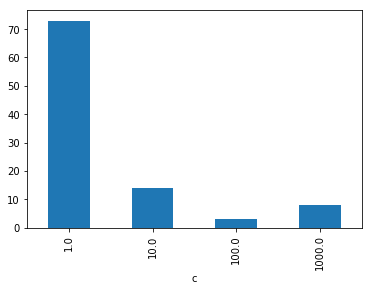

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

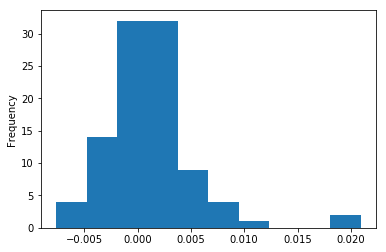

In [9]:
df_bests['diff'].plot(kind='hist')

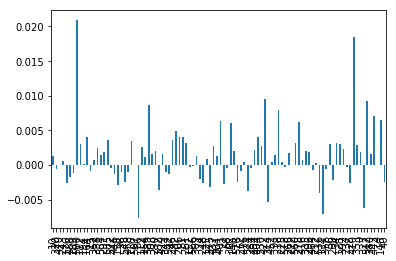

In [10]:
df_bests['diff'].plot(kind='bar')